<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/S%C3%A3o_Lu%C3%ADs_An%C3%A1lise_de_Viol%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img alt="Jonh Selmo" width="40%" src="http://jonhselmo.com.br/wp-content/uploads/2020/06/LOGO-JONH-SELMO-1.png"></center>

by [jonhselmo](https://jonhselmo.com.br)

# ANÁLISE DA CRIMINALIDADE NA GRANDE ILHA DE  SÃO LUÍS / MA

<center><img alt="São Luís" width="60%" 
src="https://i.pinimg.com/originals/43/c7/cb/43c7cbb6c4d9399e8750835388c5ffde.jpg"></center>

São Luís, frequentemente chamado de São Luís do Maranhão, é  a capital do estado do Maranhão. 

São Luís é a única cidade brasileira fundada por franceses, no dia 8 de setembro de 1612, posteriormente invadida por holandeses e por fim colonizada pelos portugueses. 

No ano de 1997 o centro histórico da cidade foi declarado patrimônio cultural da humanidade pela UNESCO.

Localiza-se na ilha de Upaon-Açu no Atlântico Sul, entre as baías de São Marcos e São José de Ribamar, no Golfão Maranhense. Mas além do município de São Luís, a ilha de Upaon-Açu possui os municípios de São José de Ribamar, Paço do Lumiar e Raposa.

Na análise, serão utilizados dados de todos os municípios que integram a Grande Ilha.




<center><img alt="Grande Ilha de São Luís" width="60%" src="https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png"><legend</center>

Fonte: [link](https://www.researchgate.net/profile/Zafira_Almeida/publication/317254654/figure/fig5/AS:628869992312832@1526945698883/Figura-1-Localizacao-da-Ilha-de-Sao-Luis-MA-Brasil.png)







# FONTE DE DADOS

Os dados utilizados são as ocorrências de MVI para o município de São Luís monitorados pelo Centro de Apoio Operacional Criminal, do Ministério Público do Estado do Maranhão, do período de 2017 a 2020.



## MVI

A metodologia MVI (Mortes Violentas Intencionais) é a forma utilizada Instituto de Pesquisas Econômicas Aplicada (IPEA) e pelo Fórum Brasileiro de Segurança Pública (FSBP) para a elaboração dos “Atlas da Violência”. Os MVIs contemplam, como forma de mortalidade violenta, os homicídios dolosos, latrocínios (roubos seguidos de morte), lesões corporais seguida de morte, vitimização policial, mortes decorrentes de intervenção policial, lesões com morte posterior, mortes em estabelecimentos prisionais e mortes a esclarecer com indícios de crime.

## DATASET

Abaixo temos a definição do caminho do dataset e a transformação do arquivo em *DataFrame*.
* `DataFrame` - É uma estrutura bidimensional (semelhante a uma planilha) que traz agilidade na manipulação dos dados. O DataFrame é composo por Series, que são estruturas unidimensionais que suportam variados tipos de dados (string, interger, float, datetime).

In [ ]:
#importação de bibliotecas necessárias
import pandas as pd

df_vslz = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/MVIMPMA.csv')

Bem, criamos o DataFrame `df_vslz` (que seria uma abreavição criada a partir do texto "`D`ata`F`rame da `V`iolência da Grande Ilha de `S`ão `L`uís"). 
Depois do carregamento do *dataset*, vamos visualizálo. No primeiro código veremos as 05 primeiras linhas e depois as 05 últimas linhas

In [ ]:
#visualização das 05 primeiras entradas
df_vslz.head()

,ID,Data,Sexo,Idade,Horário,CAUSA DA MORTE,Local,Município,Classificação
0,1,01/01/2017,masculino,22.0,03:01:00,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,2,01/01/2017,masculino,30.0,00:21:00,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,3,01/01/2017,masculino,23.0,18:30:00,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,4,01/01/2017,masculino,38.0,20:21:00,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,5,01/01/2017,feminino,49.0,23:22:00,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO


In [ ]:
#visualização das 05 últimas entradas
df_vslz.tail()

,ID,Data,Sexo,Idade,Horário,CAUSA DA MORTE,Local,Município,Classificação
1531,1532,26/05/2020,masculino,24.0,19:30:00,ARMA DE FOGO,Barramar,São Luís,HOMICÍDIO DOLOSO
1532,1533,26/05/2020,masculino,34.0,18:30:00,ARMA DE FOGO,Vila Cafeteira,São José de Ribamar,HOMICÍDIO DOLOSO
1533,1534,26/05/2020,feminino,66.0,10:00:00,OUTROS MEIOS,Recanto dos Signos,São Luís,HOMICÍDIO DOLOSO
1534,1535,31/05/2020,masculino,17.0,15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO
1535,1536,31/05/2020,masculino,15.0,15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO


##Quantidade de registros


*DataFrame* `df_vslz` criado e visualizado. Agora vamos verificar algumas informações básicas dele, como a quantidade de registros (linhas, *rows*) e as *Series* (colunas).

In [ ]:
#Verificar a quantidade de linhas e colunas
print('Quantidade de linhas:  {}'.format(df_vslz.shape[0]))
print('Quantidade de colunas: {}'.format(df_vslz.shape[1]))

Quantidade de linhas:  1536
Quantidade de colunas: 9


## Tipos de dados

Criamos e visualizamos o DataFrame. Verificamos as quantidades de registros. Agora vamos analisar os tipos de dados que compoem nosso *dataset*.
A verificação dos tipos de dados é realizado pelo código abaixo:

In [ ]:
#tipos dos dados das colunas
df_vslz.dtypes

ID                  int64
Data               object
Sexo               object
Idade             float64
Horário            object
CAUSA DA MORTE     object
Local              object
Município          object
Classificação      object
dtype: object

Percebe-se que os campos **Data**, **Horário** e Idade estão com tipos de dados inadequados.
* `Data` - Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;
* `Horário`- Apresenta tipo ***`string`*** (texto) quando deveria ser do tipo ***`datetime`*** (formato adequado para datas e horários;

## Adequação de tipos de dados indevidos

Depois de verificados os tipos de dados inadequados, o acerto se da a partir dos procedimentos abaixo:
 

In [ ]:
#modificação dos tipos de dados

#acerto da coluna Data para o tipo de dado 'datetime'
df_vslz['Data'] = pd.to_datetime(df_vslz['Data'], format= '%d/%m/%Y')

#acerto da coluna Horário para o tipo de dado 'datetime'
df_vslz['Horário'] = pd.to_datetime(df_vslz['Horário'], format='%H:%M:%S')



Verificando novamente os tipos, para constatar as **alterações**


In [ ]:
df_vslz.dtypes

ID                         int64
Data              datetime64[ns]
Sexo                      object
Idade                    float64
Horário           datetime64[ns]
CAUSA DA MORTE            object
Local                     object
Município                 object
Classificação             object
dtype: object

##Dicionário de *dados*

Ao trabalhar com datasets é normal recorrermos a uma tabela organizada, onde podemos encontrar as especificações dos elementos, os tipos de dados, as correspondencias e descrições  de códigos (ex: 1 se refere a federal, 2 a estadual, etc.). A esta coleção de metadados que contém definições e representações de elementos de dados damos o nome de Dicionário de Dados.

Abaixo vamos criar um dicionário simplificado.



Primeiramente, vamos obter uma lista com os nomes das Series ou colunas.

In [ ]:
#retorna uma lista com os nomes das colunas
df_vslz.columns

Index(['ID', 'Data', 'Sexo', 'Idade', 'Horário', 'CAUSA DA MORTE', 'Local',
       'Município', 'Classificação'],
      dtype='object')

No DataFrame a coluna `CAUSA DA MORTE` está em *uppercase*, vamos aproveitar e alterá-la  para `Causa_morte`.

In [ ]:
#remomear coluna
df_vslz.rename(columns={'CAUSA DA MORTE': 'Causa_morte'}, inplace=True)

#visualizar os nomes das colunas com as modificações
df_vslz.columns

Index(['ID', 'Data', 'Sexo', 'Idade', 'Horário', 'Causa_morte', 'Local',
       'Município', 'Classificação'],
      dtype='object')

Agora podemos montar nosso dicionário.

* `Data` (datetime)- Data da ocorrência do fato;
* `Sexo` (string)- Gênero da vítima;
* `Idade`(float) - Idade da vítima;
* `Horário` (datetime)- Horário da ocorrência do fato;
* `Causa_morte` (string) -  Especificação da causa ou do instrumento utilizado;
    * ARMA DE FOGO;
    * ARMA BRANCA;
    * ESPANCAMENTO;
    * ESTRANGULAMENTO;
    * OUTROS MEIOS;
* `Local` (string)- Bairro ou localidade da ocorrência;
* `Município` (string)- Município da Grande Ilha de São Luís;
* `Classificação`(string) - Classificação da ocorrência
    * **HOMICÍDIO DOLOSO**;
    * **LESÃO C S MORTE** - LESÃO CORPORAL SEGUIDA DE MORTE;
    * **LATROCÍNIO**;
    * **MORTE D I POLICIAL** - MORTE DECORRENTE DE INTERVENÇÃO POLICIAL;
    * **MORTE ESCLARECER** - MORTE A ESCLARECER (COM INDÍCIOS DE MVI);
    * MORTE POSTERIOR (COM INDÍCIOS DE MVI)

## Verificação de valores ausentes



Valores ausentes influenciam na criação de modelos, distorcendo análises. Por vezes temos que decidir se os registros (linhas) devem ser excluídos ou preenchidos por algum valor, seja ele uma definição de ausente ou algum parâmetro estatístico (moda, mediana, média).

No caso deste dataset optei por preencher o valor faltante por UNKNOWN (desconhecido), para não ter que excluir uma vítima.

##Quantitativos de valores ausentes

Abaixo verificamos o quantitativo de valores ausentes e o percentual desses valores frente ao total de registros.

In [ ]:
#verificação dos valores ausentes

for i in df_vslz.columns:
    print('Valores ausentes em ' + i +': {}'.format(df_vslz[i].isnull().sum()))

Valores ausentes em ID: 0
Valores ausentes em Data: 0
Valores ausentes em Sexo: 3
Valores ausentes em Idade: 14
Valores ausentes em Horário: 25
Valores ausentes em Causa_morte: 1
Valores ausentes em Local: 7
Valores ausentes em Município: 7
Valores ausentes em Classificação: 737


##Percentuais

In [ ]:
#porcentagem de valores ausentes
#porcentagem = df_vslz[i].isnull().sum()/ df_vslz.shape[0]
for i in df_vslz.columns:
    print('Valores ausentes em ' + i + ': {:,.2f}% '.format(df_vslz[i].isnull().sum()/ df_vslz.shape[0] * 100))

Valores ausentes em ID: 0.00% 
Valores ausentes em Data: 0.00% 
Valores ausentes em Sexo: 0.20% 
Valores ausentes em Idade: 0.91% 
Valores ausentes em Horário: 1.63% 
Valores ausentes em Causa_morte: 0.07% 
Valores ausentes em Local: 0.46% 
Valores ausentes em Município: 0.46% 
Valores ausentes em Classificação: 47.98% 


Observa-se que a coluna `Vítimas` é o que mais deve ser trabalhado, apresentando mais de 4% de informações inexistentes.

Preenchimento dos valores faltantes.

In [ ]:
#preenchimento dos valores ausentes
df_vslz.fillna('UNKNOWN', axis=1, inplace=True)

Vamos averiguar se as modificações sutiram efeitos.

In [ ]:
#Vericiação dos valores ausentes
df_vslz.isnull().sum()

ID               0
Data             0
Sexo             0
Idade            0
Horário          0
Causa_morte      0
Local            0
Município        0
Classificação    0
dtype: int64

Pronto!
Todos os item estão preenchidos.

In [ ]:
df_vslz

,ID,Data,Sexo,Idade,Horário,Causa_morte,Local,Município,Classificação
0,1,2017-01-01,masculino,22,1900-01-01 03:01:00,ARMA BRANCA,Coroadinho,São Luís,HOMICÍDIO DOLOSO
1,2,2017-01-01,masculino,30,1900-01-01 00:21:00,ARMA DE FOGO,Liberdade,São Luís,HOMICÍDIO DOLOSO
2,3,2017-01-01,masculino,23,1900-01-01 18:30:00,ARMA DE FOGO,São Raimundo,São Luís,HOMICÍDIO DOLOSO
3,4,2017-01-01,masculino,38,1900-01-01 20:21:00,ARMA DE FOGO,Vila Conceição – Coroadinho,São Luís,HOMICÍDIO DOLOSO
4,5,2017-01-01,feminino,49,1900-01-01 23:22:00,ARMA DE FOGO,Vila Vitória,São Luís,HOMICÍDIO DOLOSO
...,...,...,...,...,...,...,...,...,...
1531,1532,2020-05-26,masculino,24,1900-01-01 19:30:00,ARMA DE FOGO,Barramar,São Luís,HOMICÍDIO DOLOSO
1532,1533,2020-05-26,masculino,34,1900-01-01 18:30:00,ARMA DE FOGO,Vila Cafeteira,São José de Ribamar,HOMICÍDIO DOLOSO
1533,1534,2020-05-26,feminino,66,1900-01-01 10:00:00,OUTROS MEIOS,Recanto dos Signos,São Luís,HOMICÍDIO DOLOSO
1534,1535,2020-05-31,masculino,17,1900-01-01 15:53:00,ARMA DE FOGO,Cidade Operária,São Luís,HOMICÍDIO DOLOSO


##Correlação

Na análise desta seção, verificaremos a correlação entre as colunas.

A correlação mede a relação de dependência entre as varíaveis, sendo extremamente útil para análises futuras utilizando técnicas de ML - Machine Learning (Aprendizagem de máquina).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


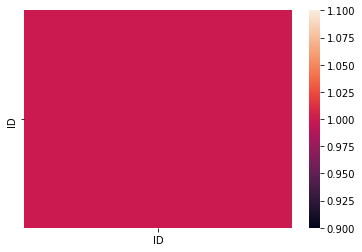

In [ ]:
#para tal importaremos a biblioteca seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib notebook


fig, ax = plt.subplots()

sns.heatmap(df_vslz.corr())
plt.show()

Verificamos que o algoritimo encontrou apenas a variavel ID, por entender que apresenta valores numéricos. 

Podemos optar em realizar um mapeamento das variáveis `Sexo`, `Município`, `Causa_morte` e `Classificação` quando formos trabalhar com modelos de ML.

#AGRUPAMENTOS


Nesta seção vamos realizar alguns agrupamentos para retirarmos insights dos dados.

> Vamos criar alguns gráficos!



##Totais



Aqui vamos buscar os totais de ocorrências por municípios.

In [ ]:
#Agrupamento de valores por município
df_vslz.groupby(['Município'])['ID'].count()

Município
Paço do Lumiar          108
Raposa                   22
São José de Ribamar     228
São Luís               1171
UNKNOWN                   7
Name: ID, dtype: int64

Abaixo temos uma rotina para adequar o rótulo à grade do gráfico.

In [ ]:
#Filtrar o valor máximo para usálo nos limites da imagem
df_vslz.groupby(['Município'])['ID'].count().max()

#atribuí-lo para variável ymaximo
ymaximo_g01 = df_vslz.groupby(['Município'])['ID'].count().max()

Foi criado novamente a rotina para o gráfico 02


In [ ]:
#atribuí-lo para variável ymaximo
ymaximo_g02 = df_vslz.groupby(['Causa_morte'])['ID'].count().max()

Agora vamos criar nossos primeiros gráficos, filtrando as ocorrências por municípios e causa da morte / intrumento utilizado.

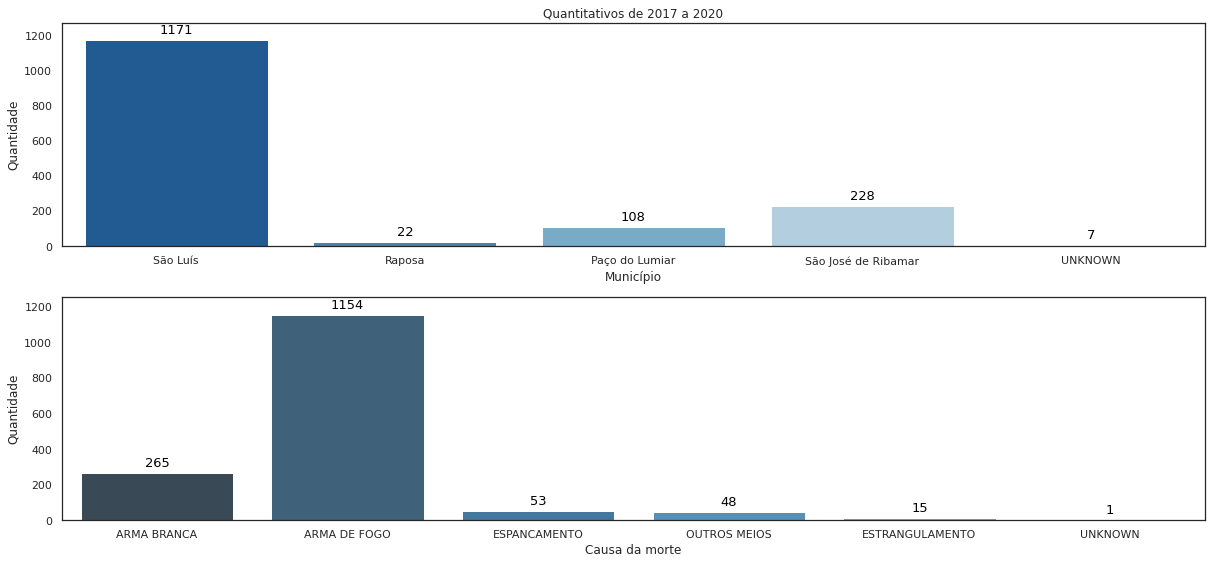

In [ ]:
#ANO
sns.set(style="white")
#sns.palplot(sns.dark_palette("purple"))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(17,8))

sns.countplot(df_vslz['Município'], palette='Blues_r', ax=ax1)
#https://seaborn.pydata.org/tutorial/color_palettes.html
ax1.set_title('Quantitativos de 2017 a 2020')
ax1.set_xlabel('Município')
ax1.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax1.set_ylim(0, ymaximo_g01 + 100)

#GRÁFICO 01
#laço para inclusão dos rótulos
for p in ax1.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax1.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')
 #To make space for the annotations

#GRÁFICO 02
sns.countplot(df_vslz['Causa_morte'], palette='Blues_d', ax=ax2)
ax2.set_xlabel('Causa da morte')
ax2.set_ylabel('Quantidade')
#instrução para que o rótulo não sobreponha a grade que circunda o gráfico
ax2.set_ylim(0, ymaximo_g02 + 100)

#laço para inclusão dos rótulos
for p in ax2.patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ax2.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

fig.show()
#fig.autofmt_xdate()
fig.tight_layout()
plt.show()

Nos gráficos abaixo, temos o agrupamento por classificação da ocorrência e pelo gênero da vítima.

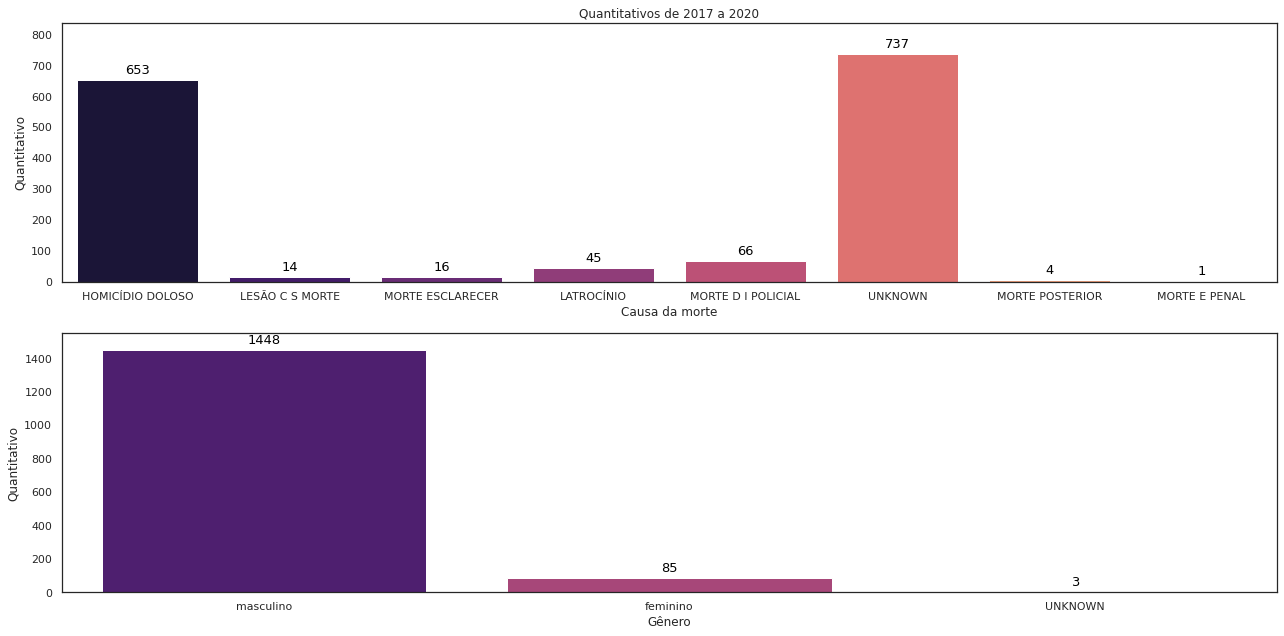

In [ ]:
ymaximo_g03 = df_vslz.groupby(['Classificação'])['ID'].count().max()
ymaximo_g04 = df_vslz.groupby(['Sexo'])['ID'].count().max()

sns.set(style="white")
fig, axe = plt.subplots(2,1, figsize=(18,9))

#GRÁFICO 03
#sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0,0]) 
sns.countplot(df_vslz['Classificação'], palette='magma', ax=axe[0])

axe[0].set_title('Quantitativos de 2017 a 2020')
axe[0].set_ylabel('Quantitativo')
axe[0].set_xlabel('Causa da morte')
axe[0].set_ylim(0, ymaximo_g03 + 100)
for p in axe[0].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[0].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')

#GRÁFICO 04
sns.countplot(df_vslz['Sexo'], palette='magma', ax=axe[1])
#axe[1].set_title('Gênero da vítima')
axe[1].set_ylabel('Quantitativo')
axe[1].set_xlabel('Gênero')
axe[1].set_ylim(0, ymaximo_g04 + 100)
for p in axe[1].patches:
             #Não tulizaremos valores decimais nos rótulos
             #ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             axe[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 10),
                 textcoords='offset points')


fig.show()
#
fig.tight_layout()


In [ ]:
#Forma alternativa para gŕafico de gênero
#sns.catplot(x="Sexo", kind="count", palette="Set2", data=df_vslz);

Na próxima visualização, agruparemos o quantitativo das ocorrências por ano.

In [ ]:
#Visualizar coluna de Data como ano.
df_vslz['Data'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
1531    2020
1532    2020
1533    2020
1534    2020
1535    2020
Name: Data, Length: 1536, dtype: int64

In [ ]:
#realizar a contagem
df_vslz['Data'].dt.year.value_counts()

2017    650
2018    408
2019    329
2020    149
Name: Data, dtype: int64

Gerar o gráfico.

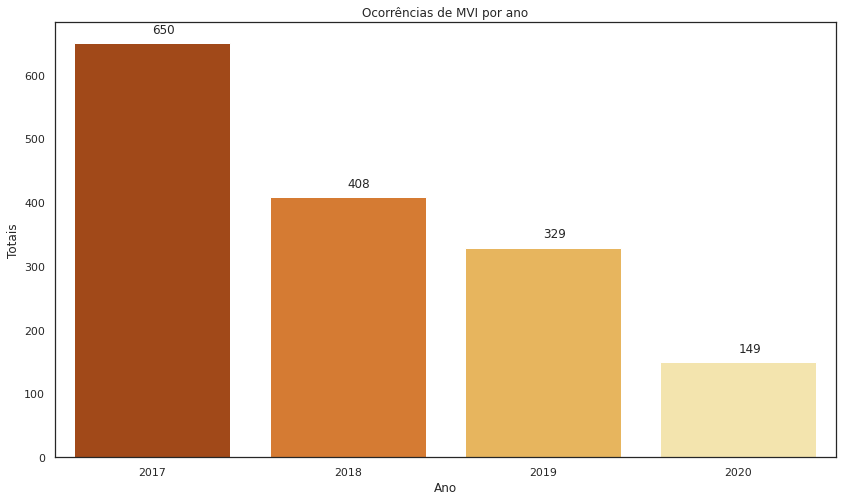

<bound method Figure.tight_layout of <Figure size 1008x576 with 1 Axes>>

In [ ]:
x = df_vslz['Data'].dt.year
sns.set(style='white')
fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(x, palette='YlOrBr_r', ax=ax)
ax.set_title('Ocorrências de MVI por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Totais')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )
#fig.autofmt_xdate()
plt.show()
fig.tight_layout

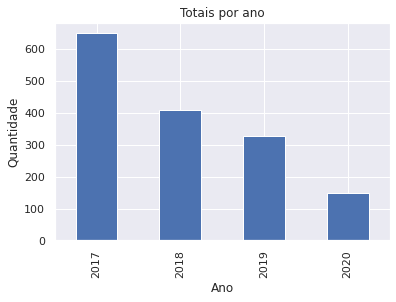

In [ ]:
#Rotina alternativa para criar o mesmo gráfico
y = df_vslz['Data'].dt.year.value_counts()
sns.set()
y.plot(kind='bar')
plt.title('Totais por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
fig.autofmt_xdate()

##Recortes

Depois de trabalharmos com os totais, vamos realizar recortes das informações.

Vamos montar em uma só imagem 04 gráficos, onde cada gráfico representa o quantitativo de ocorrências por instrumento utilizado, por município da Grande Ilha.

O novo DataFrame será criado a partir do pivotamento do DataFrame original, utilizando  a variável `Município` como coluna, a variável `ID` como index e os dados da variável `Causa_morte` como valores.

In [ ]:
#pivotamento para criação de novo DataFrame 
df_instrm = pd.pivot(df_vslz, values='Causa_morte',index='ID', columns='Município')

In [ ]:
#Visualização do novo DataFrame
df_instrm

Município,Paço do Lumiar,Raposa,São José de Ribamar,São Luís,UNKNOWN
ID,,,,,
1,NaN,NaN,NaN,ARMA BRANCA,NaN
2,NaN,NaN,NaN,ARMA DE FOGO,NaN
3,NaN,NaN,NaN,ARMA DE FOGO,NaN
4,NaN,NaN,NaN,ARMA DE FOGO,NaN
5,NaN,NaN,NaN,ARMA DE FOGO,NaN
...,...,...,...,...,...
1532,NaN,NaN,NaN,ARMA DE FOGO,NaN
1533,NaN,NaN,ARMA DE FOGO,NaN,NaN
1534,NaN,NaN,NaN,OUTROS MEIOS,NaN


Realizar a contagem dos registros de Causa da Morte / Instrumento utilizado para cada município, de 2017 a 2020.

In [ ]:
#Contagem das ocorrências de Causa da Morte
for muni in df_instrm.columns:
    print(muni)
    print('==========')
    print(df_instrm[muni].value_counts())
    print('\n')

Paço do Lumiar
ARMA DE FOGO       69
ARMA BRANCA        28
OUTROS MEIOS        6
ESTRANGULAMENTO     2
ESPANCAMENTO        2
UNKNOWN             1
Name: Paço do Lumiar, dtype: int64


Raposa
ARMA DE FOGO    17
ARMA BRANCA      5
Name: Raposa, dtype: int64


São José de Ribamar
ARMA DE FOGO       166
ARMA BRANCA         43
ESPANCAMENTO        10
OUTROS MEIOS         8
ESTRANGULAMENTO      1
Name: São José de Ribamar, dtype: int64


São Luís
ARMA DE FOGO       897
ARMA BRANCA        188
ESPANCAMENTO        40
OUTROS MEIOS        34
ESTRANGULAMENTO     12
Name: São Luís, dtype: int64


UNKNOWN
ARMA DE FOGO    5
ARMA BRANCA     1
ESPANCAMENTO    1
Name: UNKNOWN, dtype: int64




Visualização gráfica das ocorrências acima.

In [ ]:
#função para geração do rótulo
def rotulo(ax):
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

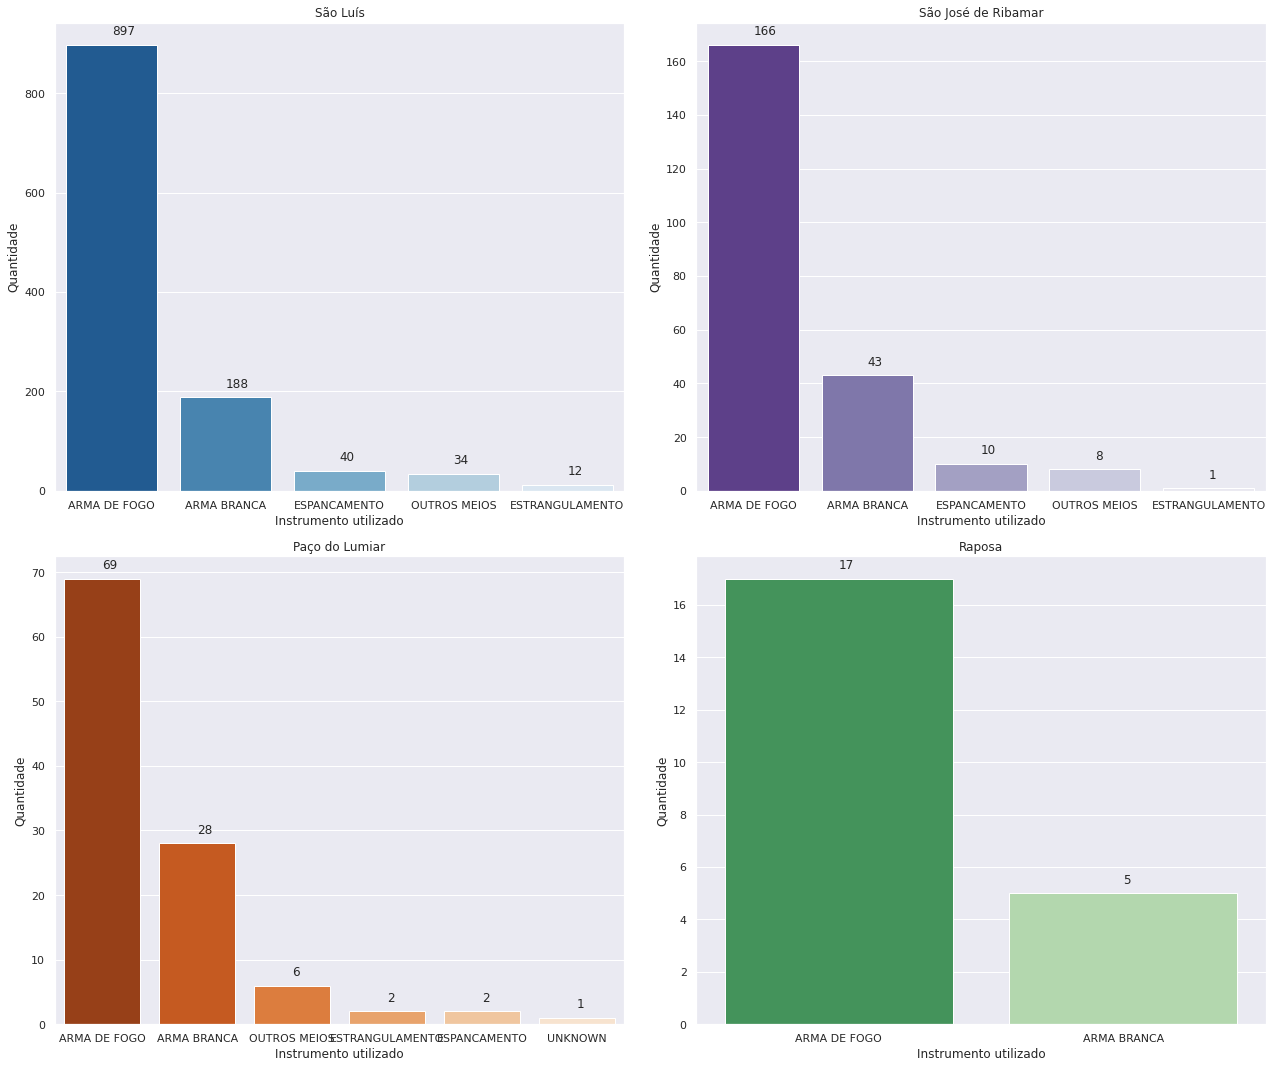

In [ ]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(2,2, figsize=(18,15))
sns.set(style='white')
sns.countplot('São Luís', palette='Blues_r', data= df_instrm, ax=ax[0,0],
              order = df_instrm['São Luís'].value_counts().index) #ordem decrescente
ax[0,0].set_title('São Luís')
ax[0,0].set_xlabel('Instrumento utilizado')
ax[0,0].set_ylabel('Quantidade')
rotulo(ax[0,0])


sns.countplot('São José de Ribamar', palette='Purples_r' ,data=df_instrm, ax=ax[0,1],
              order = df_instrm['São José de Ribamar'].value_counts().index)
ax[0,1].set_title('São José de Ribamar')
ax[0,1].set_xlabel('Instrumento utilizado')
ax[0,1].set_ylabel('Quantidade')
rotulo(ax[0,1])

sns.countplot('Paço do Lumiar', palette='Oranges_r', data=df_instrm, ax=ax[1,0],
              order = df_instrm['Paço do Lumiar'].value_counts().index)
ax[1,0].set_title('Paço do Lumiar')
ax[1,0].set_xlabel('Instrumento utilizado')
ax[1,0].set_ylabel('Quantidade')
rotulo(ax[1,0])

sns.countplot('Raposa', palette='Greens_r', data=df_instrm, ax=ax[1,1],
              order = df_instrm['Raposa'].value_counts().index)
ax[1,1].set_title('Raposa')
ax[1,1].set_xlabel('Instrumento utilizado')
ax[1,1].set_ylabel('Quantidade')
rotulo(ax[1,1])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()

##2020
Agora vamos trabalhar apenas com o ano de 2020, realizando o pivotamento por bairros de cada município.

In [ ]:
#Criar um novo DataFrame apenas com os registros de 2020
df_2020mvi = df_vslz[df_vslz['Data'].dt.year == 2020]

In [ ]:
#Visualizar o novo DataFrame
df_2020mvi.head()

,ID,Data,Sexo,Idade,Horário,Causa_morte,Local,Município,Classificação
188,189,2020-03-20,masculino,33,1900-01-01 03:40:00,ARMA DE FOGO,Anjo da Guarda,São Luís,MORTE D I POLICIAL
200,201,2020-03-26,masculino,31,1900-01-01 12:00:00,ARMA DE FOGO,Liberdade,São Luís,MORTE D I POLICIAL
201,202,2020-03-26,masculino,19,1900-01-01 12:00:00,ARMA DE FOGO,Liberdade,São Luís,MORTE D I POLICIAL
1390,1391,2020-01-01,masculino,46,1900-01-01 05:27:00,ARMA DE FOGO,Vila Valian,São Luís,HOMICÍDIO DOLOSO
1391,1392,2020-01-02,masculino,19,1900-01-01 09:30:00,ARMA BRANCA,Vila Magril,São Luís,HOMICÍDIO DOLOSO


In [ ]:
#Visão geral do DataFrame
df_2020mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 188 to 1535
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             149 non-null    int64         
 1   Data           149 non-null    datetime64[ns]
 2   Sexo           149 non-null    object        
 3   Idade          149 non-null    object        
 4   Horário        149 non-null    object        
 5   Causa_morte    149 non-null    object        
 6   Local          149 non-null    object        
 7   Município      149 non-null    object        
 8   Classificação  149 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 11.6+ KB


In [ ]:
#pivotamento para criação do Data Frame de bairros
df_bairro = pd.pivot(df_2020mvi, values='Local', index='ID', columns='Município')

Depois de criado o DataFrame de bairros (para facilitar o acesso aos dados), vamos apresentar os valores que comporão os gráficos.

In [ ]:
#rotina
for bairro in df_bairro.columns:
    print(bairro)
    print('==========')
    print(df_bairro[bairro].value_counts())
    print('\n')
   

Paço do Lumiar
La Belle Park          2
Sítio Natureza         1
Maioba                 1
Parque Araçagy         1
Conjunto Lima Verde    1
Vila São José – PCL    1
Boa Vista              1
Vila Cafeteira         1
Name: Paço do Lumiar, dtype: int64


Raposa
Vila Laci           1
Parque Florêncio    1
Name: Raposa, dtype: int64


São José de Ribamar
Parque Jair                3
Vila Alcione Ferreira      2
Alto do Turu II            2
Vila Dr. Julinho           1
Cohabiano                  1
Parque vitória             1
Centro-SJR                 1
Vila São Luís – SJR        1
São Raimundo               1
Vila Roseana Sarney        1
Turiúba                    1
vila Mestre Antônio        1
Residencial Turiúba        1
Matinha                    1
Vila São José – SJR        1
Alonso Costa               1
Oiteiro                    1
Parque Araçagi             1
Vila Cafeteira             1
Mata                       1
Campina                    1
Parque Florêncio           1
Residencia

In [ ]:
#função para geração do rótulo
def rotulo_h(ax):
    for p in ax.patches:
        ax.annotate(p.get_width(), (p.get_x() + p.get_width() / 2., p.get_height()),
               xytext=(0,10), textcoords='offset points' )

Dessa vez criaremos gráficos de barras laterais com as ocorrências por bairros para cada município.

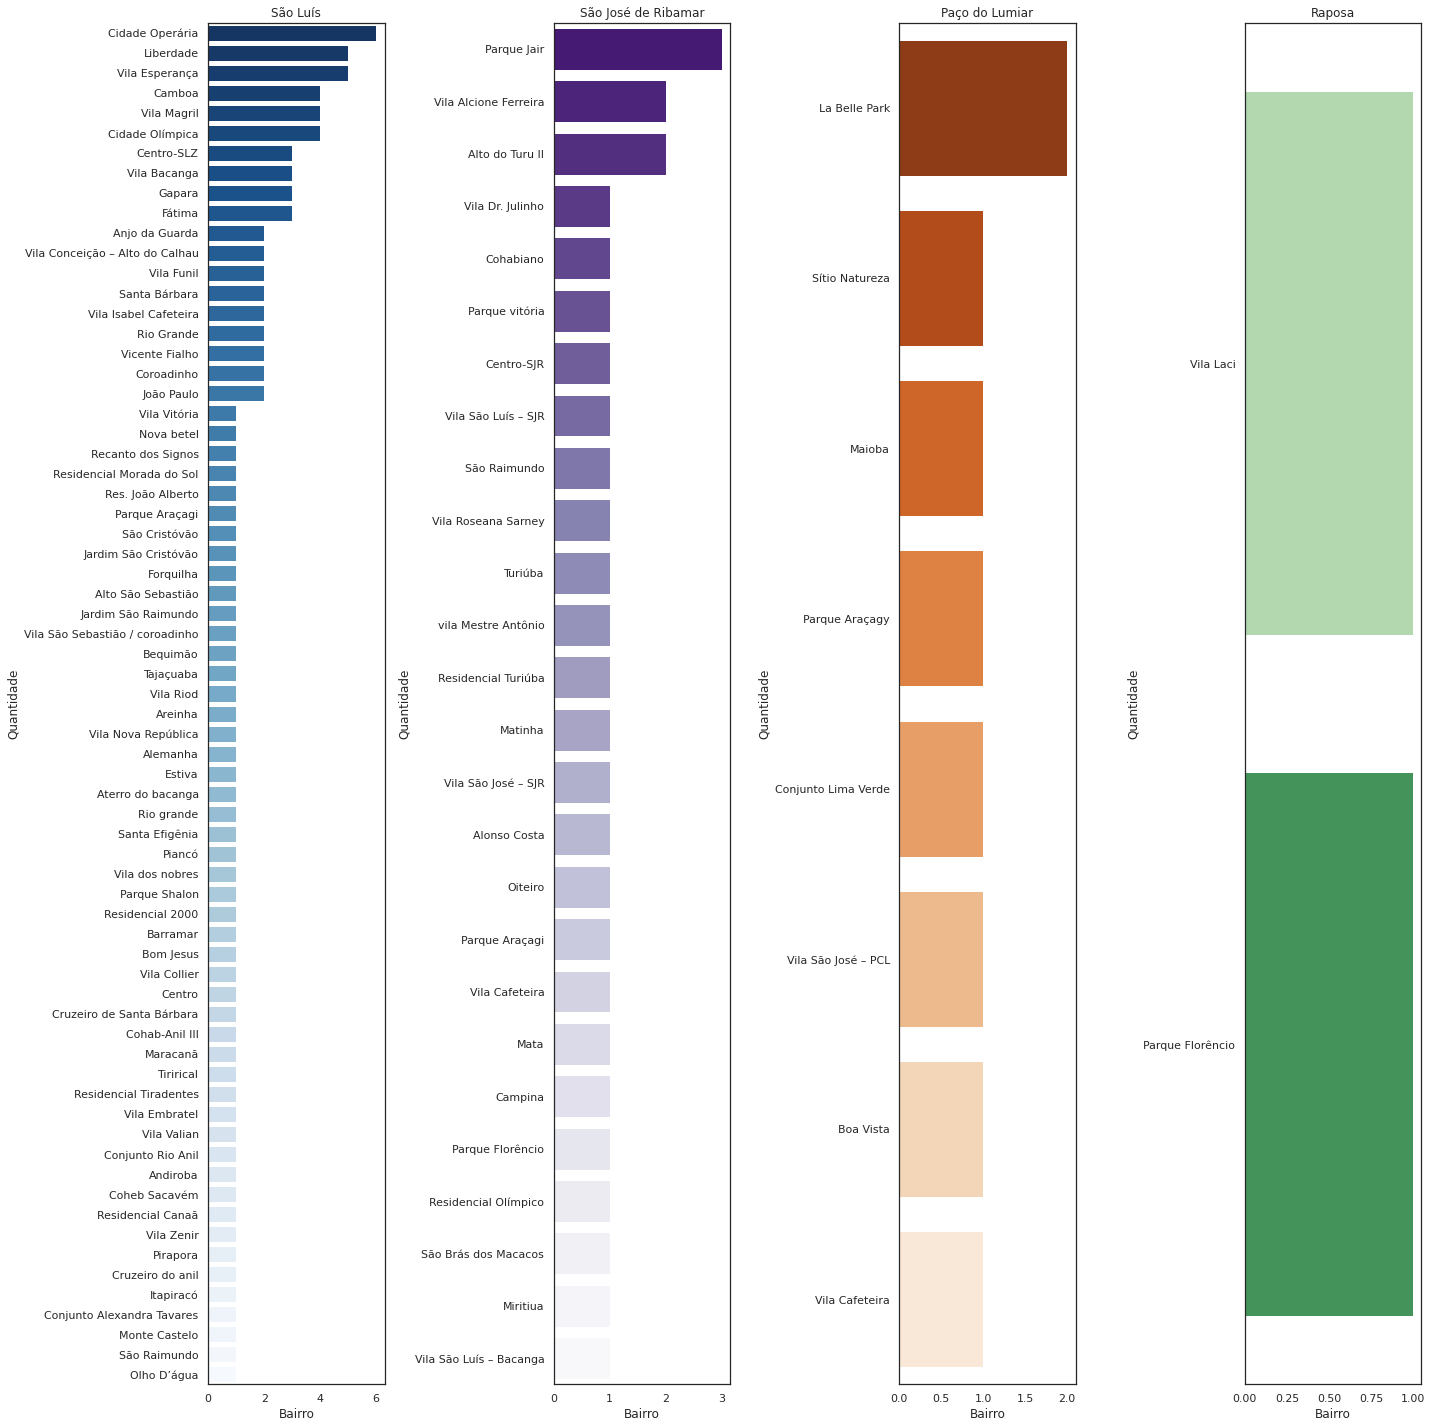

In [ ]:
#Gerar gráfico para Causa da morte para os municípios da Grande Ilha
fig, ax=plt.subplots(1,4, figsize=(20,20))
sns.set(style='white')
sns.countplot(y='São Luís', palette='Blues_r', data= df_bairro, ax=ax[0],
              order = df_bairro['São Luís'].value_counts().index) #ordem decrescente
ax[0].set_title('São Luís')
ax[0].set_xlabel('Bairro')
ax[0].set_ylabel('Quantidade')
#rotulo_h(ax[0])



sns.countplot(y='São José de Ribamar', palette='Purples_r' ,data=df_bairro, ax=ax[1],
              order = df_bairro['São José de Ribamar'].value_counts().index)
ax[1].set_title('São José de Ribamar')
ax[1].set_xlabel('Bairro')
ax[1].set_ylabel('Quantidade')
#rotulo(ax[1])

sns.countplot(y='Paço do Lumiar', palette='Oranges_r', data=df_bairro, ax=ax[2],
              order = df_bairro['Paço do Lumiar'].value_counts().index)
ax[2].set_title('Paço do Lumiar')
ax[2].set_xlabel('Bairro')
ax[2].set_ylabel('Quantidade')
#rotulo(ax[2])

sns.countplot(y='Raposa', palette='Greens', data=df_bairro, ax=ax[3],
              order = df_bairro['Raposa'].value_counts().index)
ax[3].set_title('Raposa')
ax[3].set_xlabel('Bairro')
ax[3].set_ylabel('Quantidade')
#rotulo(ax[3])

fig.show

#fig.autofmt_xdate()
fig.tight_layout()

#WORLDCLOUD


A Word Cloud ou Nuvem de Palavra é uma combinação de vários tamanhos de fonte diferentes em uma única visualização, muito utilizada utilizada para fins analíticos, onde pode ser mostrado facilmente para o usuário a frequência com que um termo se apresenta.



Assim, vamos montar nossa world cloud com as palavras que existem no dataset.

In [ ]:
#instalação dos pacotes necessários
!pip install wordcloud -q

In [ ]:
#importe dos pacotes necessários
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#criar uma cópia do DataFrame original
df_worldcloud = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/MVIMPMA_VIT.csv")

Utilizaremos as colunas vítimas, sexo, causa_morte, local, município e classificação.

In [ ]:
#seleção das colunas
df_worldcloud = df_worldcloud[['Vítima', 'Sexo', 'CAUSA DA MORTE','Local', 'Município', 'Classificação']]

In [ ]:
df_worldcloud.fillna('UNKNOWN', axis=1, inplace=True)

Agora vamos transformar o dataset em um texto corrido.

In [ ]:
lista = []
for i in df_worldcloud.columns:
    text = " ".join(s for s in df_worldcloud[i])
    lista.append(text)


In [ ]:
texto2 = str(lista)

Pronto! Agora vamos de fato criar nossa world cloud.



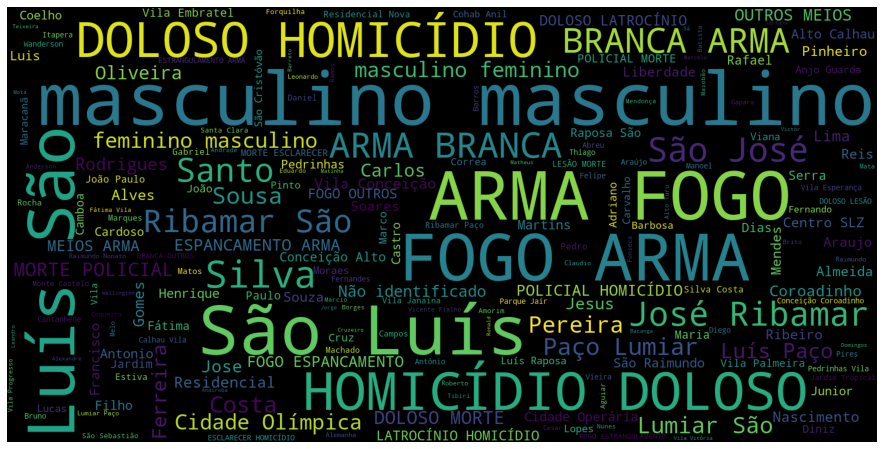

In [ ]:
#Definir as stopwords
stopwords = set(STOPWORDS)
stopwords.update(['de', 'UNKNOWN', 'dos', 'da'])


#Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black',
                      width=1600, height=800).generate(texto2)


#criar a imagem
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

Agora vamos criar mesma wordcloud acima, mas utilizando uma imagem como máscara.

Utilizaremos uma imagem da Grande Ilha, feita a partir de um recorte do google maps.

<center><img alt="São Luís" width="50%" 
src="http://jonhselmo.com.br/wp-content/uploads/2020/06/Captura-de-tela-de-2020-06-24-18-09-12.png"></center>

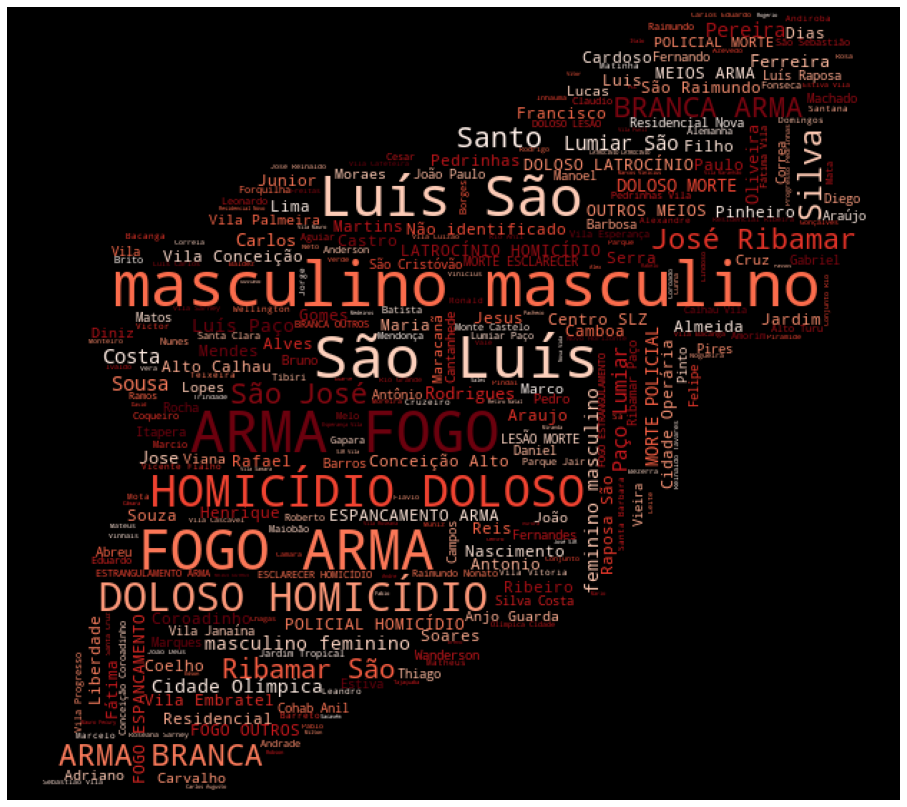

In [ ]:
# endereço LOCAL da SUA imagem
import numpy as np
from PIL import Image
grandeilha_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/dataset/ilaha.png"))
   

#Definir as stopwords
stopwords = set(STOPWORDS)
stopwords.update(['de', 'UNKNOWN', 'dos', 'da'])


#Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='black',
                      width=2000, height=2000, max_words=2000,
                      mask=grandeilha_mask, max_font_size=200, colormap='Reds'
                      ).generate(texto2)


#criar a imagem
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
fig.savefig('ilha_wcloud.png', format='png', dpi=300)

In [ ]:
#fig.savefig('ilha_wcloud.png', format='png', dpi=1200)

#CONCLUSÃO

Ao trabalhar com o dataset podemos percerber que ainda existem dados a serem tratados ( e isso representa praticamento 80% de todo um projeto de data science), como os valores ausentes.

Pudemos retirar insights valorosos, como aferir que:

* As armas de fogos são os instrumentos que mais causam mortes, seguidos pelas armas brancas. Mas também notamos que os espancamentos possuem uma quantidade expressiva de ocorrências.

* São Luís possui a maior quantidade de ocorrências (possui a maior população), enquanto Raposa possui as menores quantidades (município com menor população).

* Verificamos que o bairro Cidade Operária é o bairro mais violento de São Luís, considerando os registros de 2020 até o mês de maio.

Outros insights podem ser tirados dos dados, bastando escolhermos o contexto.